In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

c:\Users\asadullahqamar.qamar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\asadullahqamar.qamar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Time Series Analysis

In [2]:
dff = pd.read_excel("../Data/gasoline_price_sentiment_pre-processed_7.xlsx", "Sheet1")
dff7 = pd.read_excel("../Data/gasoline_price_sentiment_pre-processed_7.xlsx", "Sheet1")
dff30 = pd.read_excel("../Data/gasoline_price_sentiment_pre-processed_30.xlsx", "Sheet1")
dff365 = pd.read_excel("../Data/gasoline_price_sentiment_pre-processed_365.xlsx", "Sheet1")
dff.index = dff['Date']
dff7.index = dff7['Date']
dff30.index = dff30['Date']
dff365.index = dff365['Date']
del dff['Date']
del dff7['Date']
del dff30['Date']
del dff365['Date']
del dff["Unnamed: 0"]
del dff7["Unnamed: 0"]
del dff30["Unnamed: 0"]
del dff365["Unnamed: 0"]

In [3]:
dff.head()

,price,popularity,general_sentiment,positive_outlook,happiness,bittersweet,confidence,disgust,disagreement,anxiety,...,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,sunday,price_lag_7,price_rm,price_ewm
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,87.240684,512.0,0.725496,0.954908,1.006521,0.998807,1.002457,1.019614,1.049026,1.003928,...,0,0,1,0,0,0,0,NaN,NaN,87.240684
2010-01-02,87.240684,290.4,0.925469,0.942806,1.017355,0.996551,0.990483,1.017355,0.979214,1.003485,...,0,0,0,1,0,1,0,NaN,NaN,87.240684
2010-01-03,87.240684,230.9,0.860199,0.971601,1.008735,0.991261,0.999452,1.008735,1.061160,1.003706,...,0,0,0,0,1,1,1,NaN,NaN,87.240684
2010-01-04,87.240684,1261.1,0.959104,0.963869,1.002389,1.000800,1.002389,1.002786,1.011522,1.005566,...,0,0,0,0,0,0,0,NaN,NaN,87.240684
2010-01-05,88.983266,1902.5,0.994995,0.964214,1.004993,1.002625,0.999205,1.002099,1.008676,1.001046,...,0,0,0,0,0,0,0,NaN,NaN,87.676330


### Stationarity for Each Variable

In [4]:
# import adfuller here
from statsmodels.tsa.stattools import adfuller

# plt.figure(figsize=(22,10))

#Analyse each variable and ascertain if it is stationary so that it can be used for time series.
i=1
print(f"\nAdfuller test shows that...", end="\n")
for col in dff.columns:
    
    #Check for stationarity
    if dff[col].min() > 0:
        ts = dff[col]
        subplt = int(str(9) + str(3) + str(i))
        # plt.subplot(subplt)
        # plt.title(col)
        # plt.plot(ts.index,ts)

        try:
            ad = adfuller(ts)
        except:
            print(f"{col} contains missing values")
            continue

        report = col
        report += " is stationary for " 

        if(ad[0] < ad[4]['1%']):
            report += "1%, "

        if(ad[0] < ad[4]['5%']):
            report += "5%, "
        
        if(ad[0] < ad[4]['10%']):
            report += "10% "
        
        report += "significance level"

        if(not(ad[0] < ad[4]['1%'] and ad[0] < ad[4]['5%'] and ad[0] < ad[4]['10%'] )):
            report = f"{col} is not stationary"

        print(report)
    else:
        print(f"{col} contains negative values")
            
    #Differencing to make it stationary
    
    i+=1


Adfuller test shows that...
price is not stationary
popularity is stationary for 1%, 5%, 10% significance level
general_sentiment is stationary for 1%, 5%, 10% significance level
positive_outlook is stationary for 1%, 5%, 10% significance level
happiness is stationary for 1%, 5%, 10% significance level
bittersweet is stationary for 1%, 5%, 10% significance level
confidence is stationary for 1%, 5%, 10% significance level
disgust is stationary for 1%, 5%, 10% significance level
disagreement is stationary for 1%, 5%, 10% significance level
anxiety is stationary for 1%, 5%, 10% significance level
gloominess is stationary for 1%, 5%, 10% significance level
distress is stationary for 1%, 5%, 10% significance level
violent is stationary for 1%, 5%, 10% significance level
unexpectedness is stationary for 1%, 5%, 10% significance level
timeliness is stationary for 1%, 5%, 10% significance level
confusion is stationary for 1%, 5%, 10% significance level
feelingsVsTruth is stationary for 1%, 5%

### In-Depth Analysis by Variable

In [5]:
dff.columns

Index(['price', 'popularity', 'general_sentiment', 'positive_outlook',
       'happiness', 'bittersweet', 'confidence', 'disgust', 'disagreement',
       'anxiety', 'gloominess', 'distress', 'violent', 'unexpectedness',
       'timeliness', 'confusion', 'feelingsVsTruth', 'buyVsSell',
       'buyVsSellForecast', 'priceTrend', 'pricePrediction', 'volatile',
       'consumptionCommodity', 'productionCommodity', 'regulatory',
       'supplyDemandBalance', 'supplyDemandBalanceForecast', 'exploration',
       'accidents', 'National_Holiday', 'Weekend', 'Holidays', 'happiness_Log',
       'bittersweet_Log', 'disgust_Log', 'disagreement_Log', 'anxiety_Log',
       'gloominess_Log', 'distress_Log', 'violent_Log', 'unexpectedness_Log',
       'confusion_Log', 'buyVsSell_sqrt', 'pricePrediction_Log',
       'volatile_Log', 'productionCommodity_Log', 'regulatory_Log',
       'supplyDemandBalance_Log', 'exploration_Log', 'accidents_Log',
       'month-1', 'month-2', 'month-3', 'month-4', 'month-5'

The above columns need to be explored in-depth as a time series

#### Configurations for EDA on post-processing

In [6]:
#Set which window we want to explore.
dff = dff7 
# dff = dff30
# dff = dff365
variable = "price" # Set the variable to explore

#### EDA on Selected Configurations

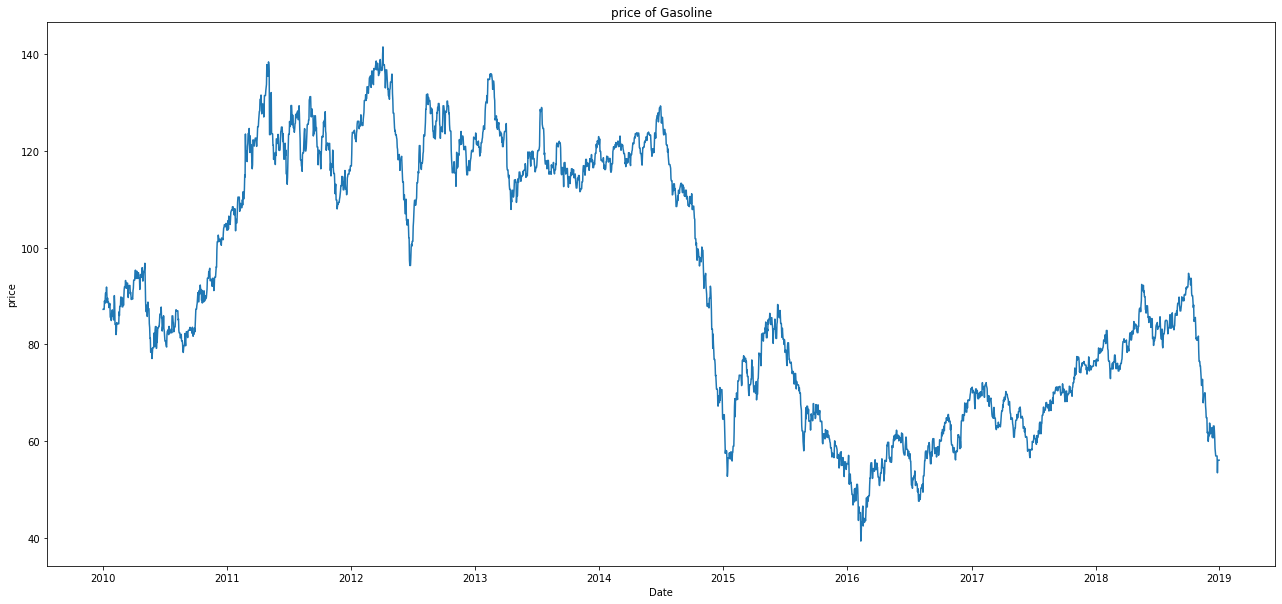

In [7]:
# Gasoline Price between 2010 to 2018
ts = dff[[variable]]
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts[variable])
plt.title(variable + " of Gasoline")
plt.xlabel("Date")
plt.ylabel(variable)
plt.show()

##### Additive

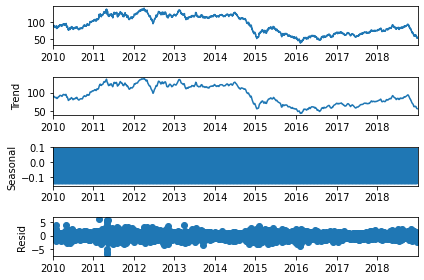

In [38]:
result1 = seasonal_decompose(ts, model='additive', period=7)
result1.plot()
plt.show()

##### Multiplicative

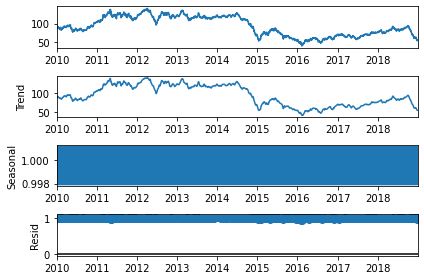

In [39]:
result2 = seasonal_decompose(ts, model='multiplicative', period=7)
result2.plot()
plt.show()

##### Plot the Residuals

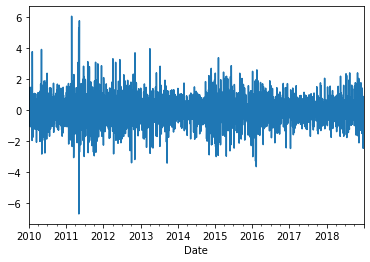

In [40]:
result1.resid.plot()
plt.show()

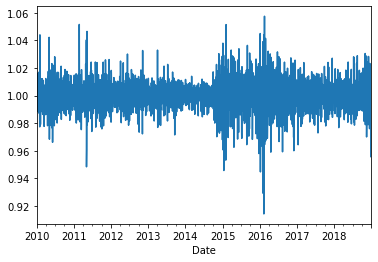

In [41]:
result2.resid.plot()
plt.show()

##### Differentiate the Variable and Analyse It

In [42]:
print(f"Variable: {variable}")
adtest = adfuller(ts[variable])
print('ADF Statistic: %f' % adtest[0])
print('p-value: %f' % adtest[1])
print('Critical Values:')
for key, value in adtest[4].items():
    print('\t%s: %.3f' % (key, value))

Variable: price
ADF Statistic: -1.131435
p-value: 0.702375
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [43]:
print(f"Variable: {variable}")
residual = result2.resid
residual = residual[~np.isnan(residual)]
adtest2 = adfuller(residual)
print('ADF Statistic: %f' % adtest2[0])
print('p-value: %f' % adtest2[1])
print('Critical Values:')
for key, value in adtest2[4].items():
    print('\t%s: %.3f' % (key, value))

Variable: price
ADF Statistic: -19.700727
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


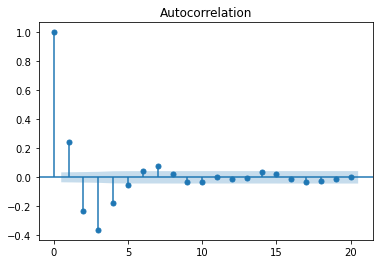

In [50]:
plot_acf(residual, lags= 20)
plt.show()

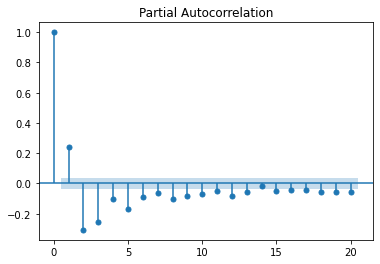

In [47]:
plot_pacf(residual, lags= 20)
plt.show()

In [17]:
# import adfuller here
from statsmodels.tsa.stattools import adfuller

# def a 'check_adfuller' function that takes in argument (ts) here. Print test statistic and p-value and  critical value.

def check_adfuller(ts):
    """Performs the dickey-fuller test using the statsmodels tsa package."""
    return adfuller(ts)

def check_mean_std (ts, w):
    """ Get a rolling statistics of mean of ts, window size =6. Get rolling std of window size 6. 
    Return a plot showing the original ts, rolling mean and rolling std."""
    
    # Calculate Rolling statistics
    rolmean = ts.rolling(window=w).mean()
    rolstd = ts.rolling(window=w).std()

    # Plot the rolling mean & rolling std
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel(variable)
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

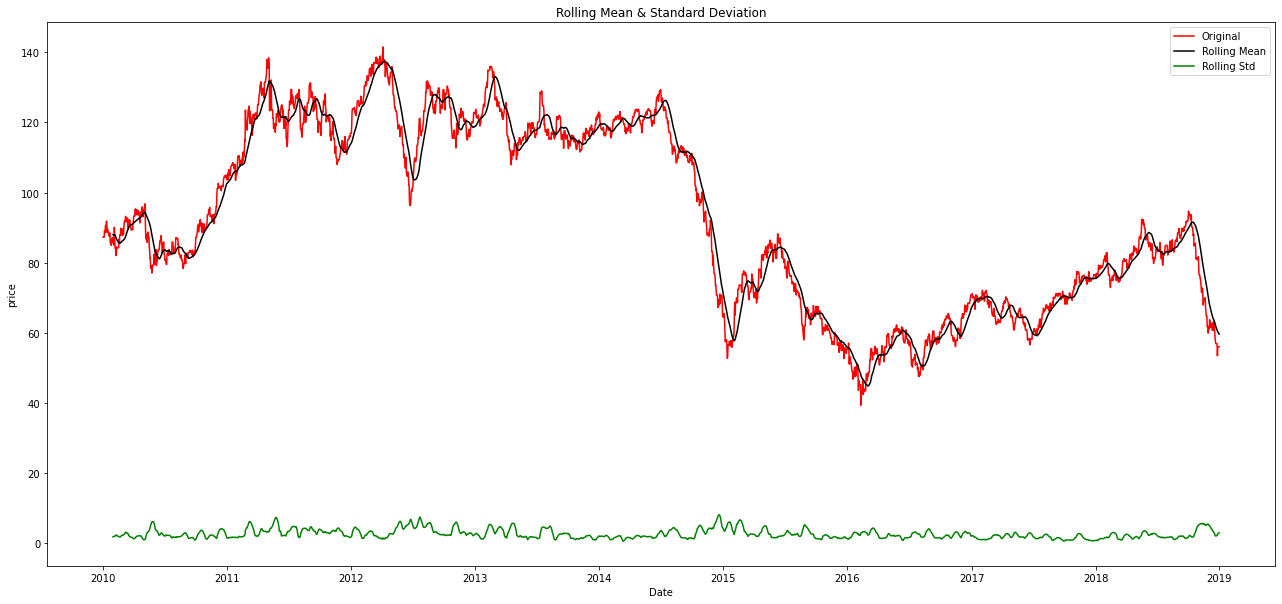

((-1.1314347899307127,
  0.7023747038139981,
  7,
  3279,
  {'1%': -3.4323458605158654,
   '5%': -2.8624218526902547,
   '10%': -2.567239428686678},
  10716.826673955156),
 None)

In [18]:
# Execute your check_adfuller function and check_mean_std here.
check_adfuller(ts[variable]), check_mean_std(ts, 30)

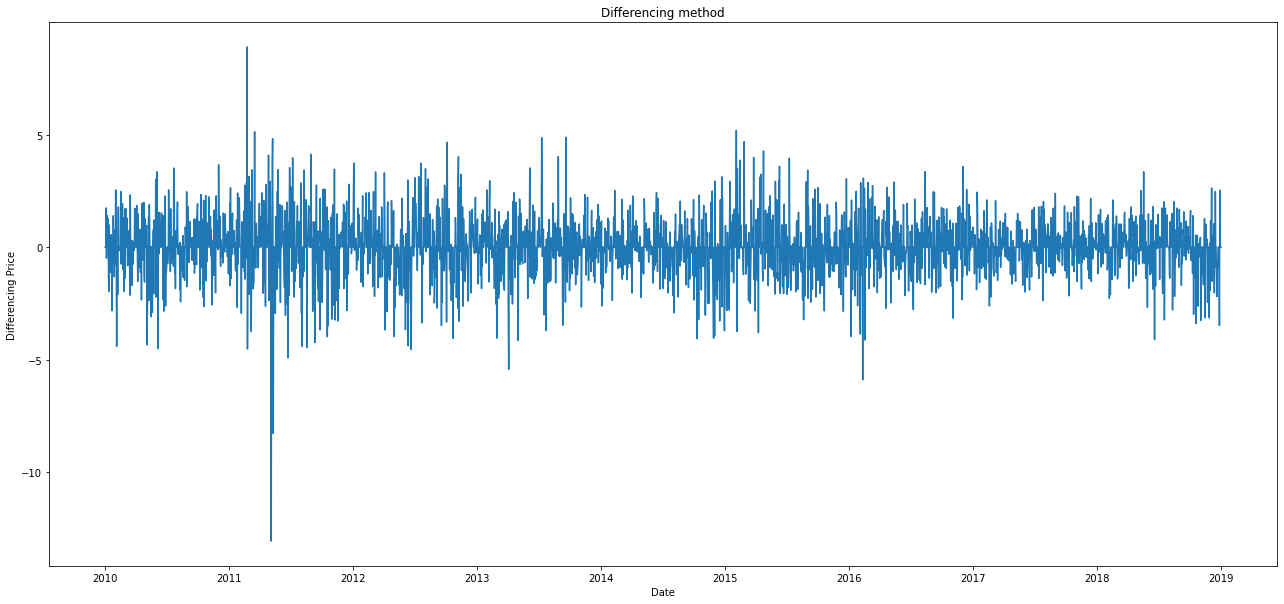

In [19]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Price")
plt.show()

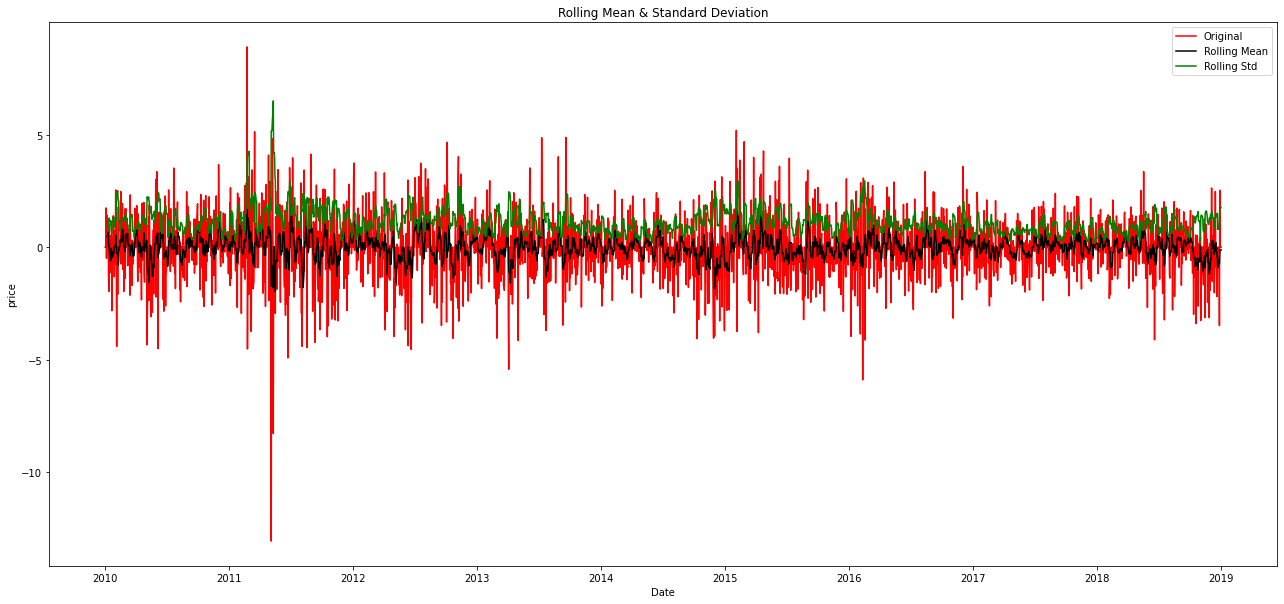

(-20.188583941146053,
 0.0,
 6,
 3279,
 {'1%': -3.4323458605158654,
  '5%': -2.8624218526902547,
  '10%': -2.567239428686678},
 10713.835268103026)

In [20]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values

# check stationarity: mean, variance(std)and adfuller test
check_mean_std(ts_diff, 7)
check_adfuller(ts_diff[variable])

In [21]:
from statsmodels.tsa.stattools import acf, pacf, ccf
ts_y = dff[variable]

lag_acf = acf(ts[variable], nlags=20)
lag_pacf = pacf(ts[variable], nlags=20, method='ols')
lag_ccf = ccf(x=ts[variable], y=ts_y) #To see how many lags is relevant to our independent variable

c:\Users\asadullahqamar.qamar\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


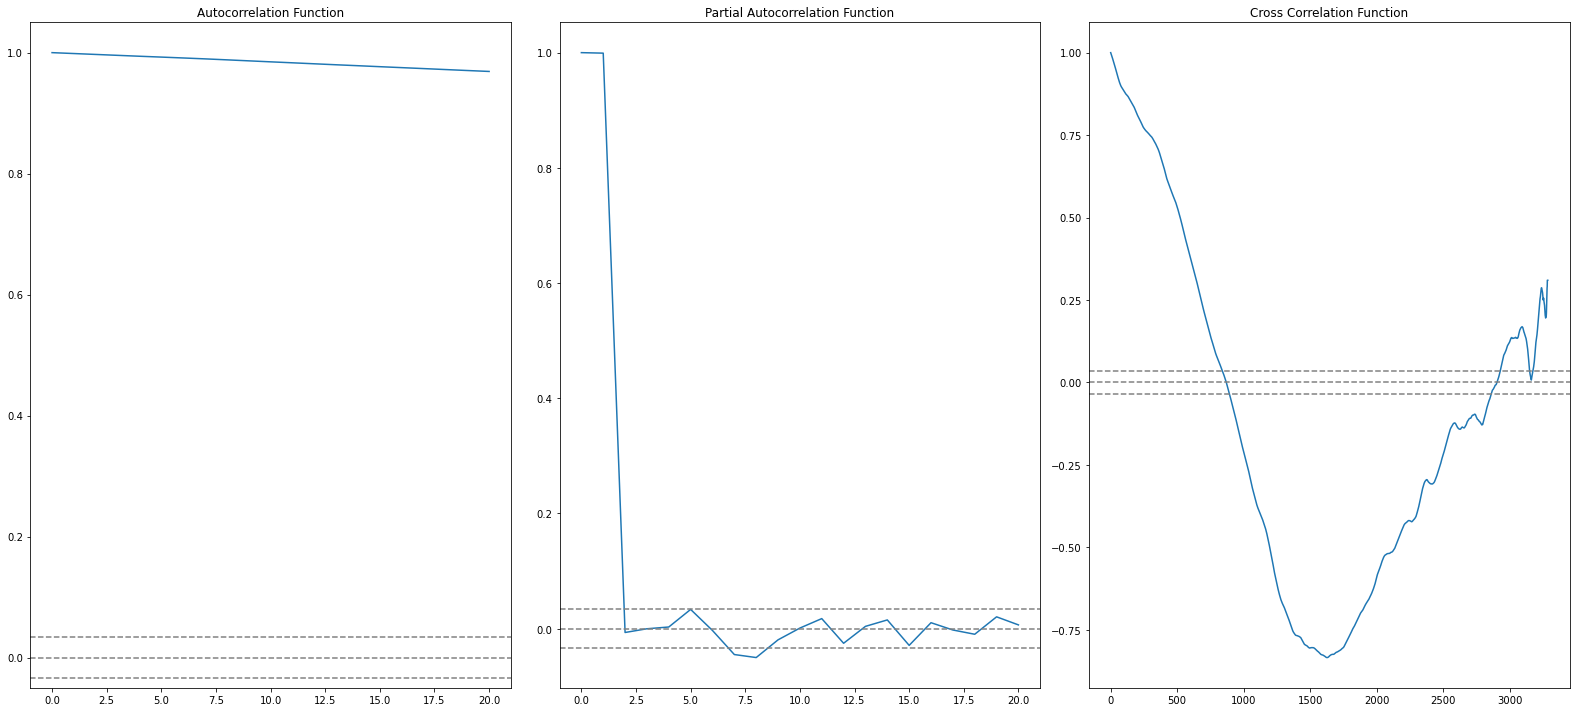

In [22]:
# ACF Plot 
plt.figure(figsize=(22,10))

plt.subplot(131) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF Plot
plt.subplot(132)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# CCF Plot
plt.subplot(133)
plt.plot(lag_ccf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Cross Correlation Function')
plt.tight_layout()

### VAR-Related EDA

#### Granger Causality Test

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    dff = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    dff.columns = [var + '_x' for var in variables]
    dff.index = [var + '_y' for var in variables]
    return dff


In [24]:
# Converting the time series data to long table format
wide_df = dff.pivot(columns = 'price')
wide_df = wide_df.reset_index(level = ['Date'])
wide_df

Date       popularity                                    \
price            39.3004351694721 40.1703138662842 42.4216412220086   
0     2010-01-01              NaN              NaN              NaN   
1     2010-01-02              NaN              NaN              NaN   
2     2010-01-03              NaN              NaN              NaN   
3     2010-01-04              NaN              NaN              NaN   
4     2010-01-05              NaN              NaN              NaN   
...          ...              ...              ...              ...   
3282  2018-12-27              NaN              NaN              NaN   
3283  2018-12-28              NaN              NaN              NaN   
3284  2018-12-29              NaN              NaN              NaN   
3285  2018-12-30              NaN              NaN              NaN   
3286  2018-12-31              NaN              NaN              NaN   

                                                                           \
price 43.1837543195343 43.2403720357558 43.5173135856184 43.5263115131684   
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  NaN              NaN              NaN              NaN   
...                ...              ...              ...              ...   
3282               NaN              NaN              NaN              NaN   
3283               NaN              NaN              NaN              NaN   
3284               NaN              NaN              NaN              NaN   
3285               NaN              NaN              NaN              NaN   
3286               NaN              NaN              NaN              NaN   

                                        ...       price_ewm                   \
price 43.567170738996 43.8944557747719  ... 137.85573838872 137.877051563708   
0                 NaN              NaN  ...             NaN              NaN   
1                 NaN              NaN  ...             NaN              NaN   
2                 NaN              NaN  ...             NaN              NaN   
3                 NaN              NaN  ...             NaN              NaN   
4                 NaN              NaN  ...             NaN              NaN   
...               ...              ...  ...             ...              ...   
3282              NaN              NaN  ...             NaN              NaN   
3283              NaN              NaN  ...             NaN              NaN   
3284              NaN              NaN  ...             NaN              NaN   
3285              NaN              NaN  ...             NaN              NaN   
3286              NaN              NaN  ...             NaN              NaN   

                                                                           \
price 137.965657561517 138.174443375244 138.315259402925 138.431290873992   
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  NaN              NaN              NaN              NaN   
...                ...              ...              ...              ...   
3282               NaN              NaN              NaN              NaN   
3283               NaN              NaN              NaN              NaN   
3284               NaN              NaN              NaN              NaN   
3285               NaN              NaN              NaN              NaN   
3286               NaN              NaN              NaN              NaN   

                                           

In [25]:
wide_df.columns = wide_df.columns.droplevel(0)
wide_df
wide_df.columns = ['date', 'item1', 'item2']
wide_df.set_index('Date', inplace = True)

ValueError: Length mismatch: Expected axis has 164397 elements, new values have 3 elements

In [ ]:
grangers_causation_matrix(wide_df, variables = wide_df.columns)        

MemoryError: Unable to allocate 201. GiB for an array with shape (164397, 164397) and data type float64

#### Cointegration test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.
Order of `integration(d)` is nothing but the number of differencing required to make a non-stationary time series stationary.


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(wide_df)

c:\Users\asadullahqamar.qamar\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:577: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "
